In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 
    

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

In [2]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
auto_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
symboling            195 non-null int64
normalized-losses    195 non-null object
make                 195 non-null object
fuel-type            195 non-null object
aspiration           195 non-null object
num-of-doors         195 non-null object
body-style           195 non-null object
drive-wheels         195 non-null object
engine-location      195 non-null object
wheel-base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb-weight          195 non-null int64
engine-type          195 non-null object
num-of-cylinders     195 non-null object
engine-size          195 non-null int64
fuel-system          195 non-null object
bore                 195 non-null float64
stroke               195 non-null float64
compression-ratio    195 non-null float64
horsepower           195 non-n

# numerical feature correlation agaist price

In [5]:
num = ['wheel-base', 'engine-type', 'engine-location', 'length', 'width', 'height', 'curb-weight', 
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
       'highway-mpg', 'price']
num_feature = auto_prices[num]
num_feature.corr()['price']

wheel-base           0.585793
length               0.695331
width                0.754273
height               0.138291
curb-weight          0.835729
engine-size          0.888942
bore                 0.546873
stroke               0.093746
compression-ratio    0.069500
horsepower           0.811027
peak-rpm            -0.104333
city-mpg            -0.702685
highway-mpg         -0.715590
price                1.000000
Name: price, dtype: float64

In [6]:
num = ['curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_feature = auto_prices[num]
num_feature.corr()['price']

curb-weight          0.835729
engine-size          0.888942
bore                 0.546873
stroke               0.093746
compression-ratio    0.069500
horsepower           0.811027
peak-rpm            -0.104333
city-mpg            -0.702685
highway-mpg         -0.715590
price                1.000000
Name: price, dtype: float64

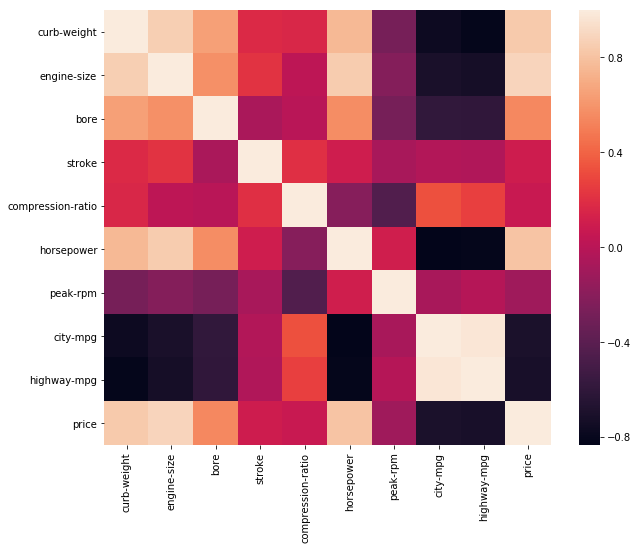

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()
sns.heatmap(num_feature.corr(), ax=ax)

# exploration

maker distribution

Text(0.5, 1.0, 'auto maker distribution')

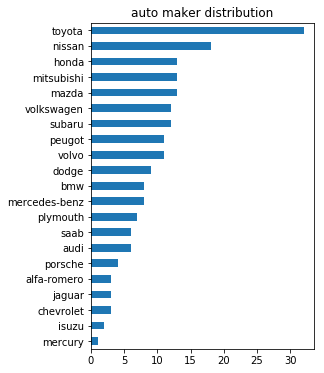

In [8]:
count = auto_prices.make.value_counts().sort_values()

fig = plt.figure(figsize=(4, 6))
ax = fig.gca()
count.plot.barh()
ax.set_title('auto maker distribution')

japanese maker dominate autoitive market

# city mpg and engine size agaist price

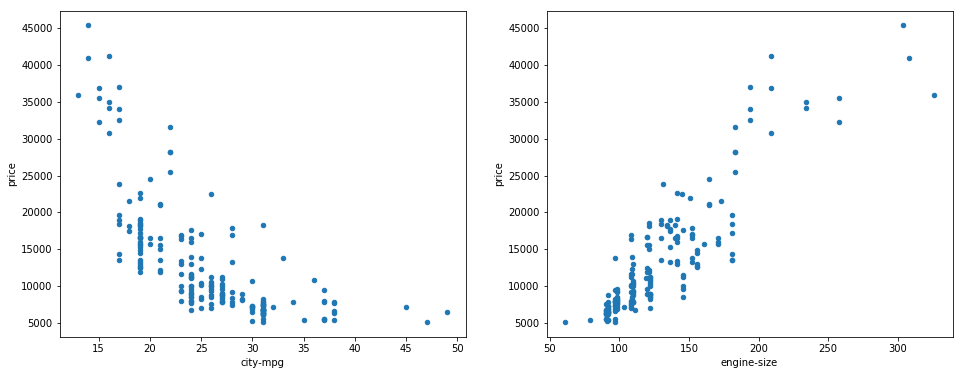

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
auto_prices.plot(x='city-mpg', y='price' ,kind='scatter', ax=ax1)
auto_prices.plot(x='engine-size', y='price' ,kind='scatter', ax=ax2)

see how price move in different direction
mdium to high efficiency city car tagged with lower price indicate serving larger target market
at the other hand low efficiency car

# engine type on horsepower 

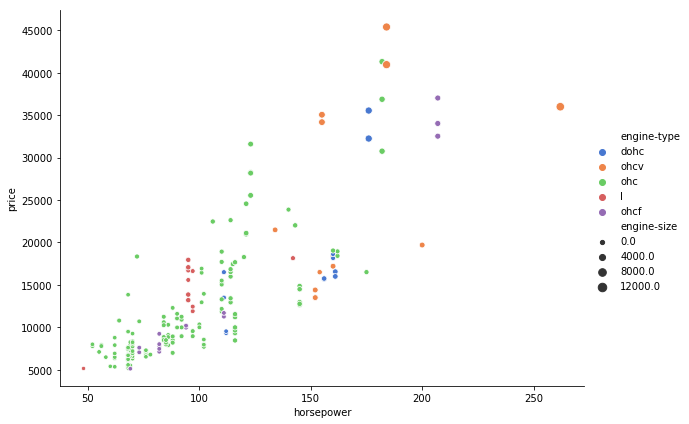

In [10]:
dot_size = .1 * auto_prices['engine-size']  * auto_prices['engine-size']
sns.relplot(x="horsepower", y="price", hue="engine-type", size=dot_size, palette="muted",
            height=6, aspect=1.4, data=auto_prices)

    ohc: low-mid hp, low-high price.
    ohcv: mid-high hp, mid-high price.
    i: low-md hp, low-mid price.
    ohcf: low & high hp, low & high price.
    dohc: mid hp, mid-high price.

# body type distribution on price

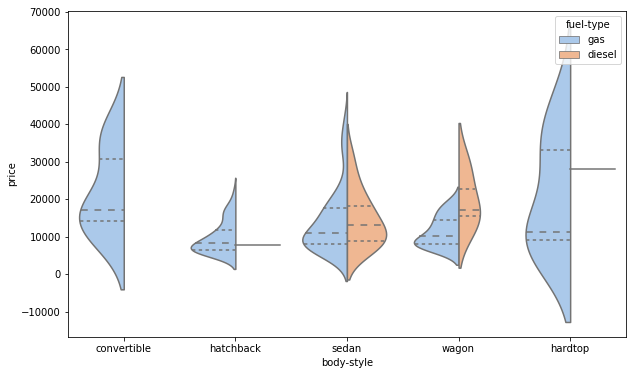

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.violinplot(data = auto_prices, 
               x = 'body-style', 
               y = 'price', 
               hue='fuel-type', 
               ax=ax,
               inner='quart',
               palette='pastel',
               split=True)

<BarContainer object of 195 artists>

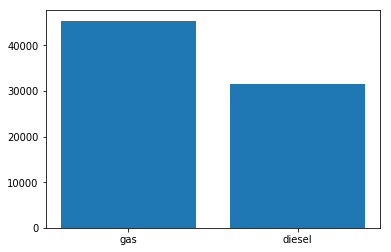

In [22]:
plt.bar(x=auto_prices['fuel-type'],
        height=auto_prices.price)

# Preprocessing

defining feature (x) and targey (y)

In [12]:
categorical = ['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type']
num = ['curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
feature = []
feature.extend(categorical)
feature.extend(num)
df = auto_prices[feature]

x = df.drop('price', axis=1)
y = df['price']

create dummy for categorical data type
dropping original column

In [13]:
### labeling category
# dummies feature
# drop original
categorical = ['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type']
for feature in categorical:
    dummies = pd.get_dummies(x[feature], prefix=feature)
    x = pd.concat([x, dummies], axis=1)
    x.drop([feature], axis=1, inplace=True)


In [17]:
columns = x.columns
columns

Index(['curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_diesel',
       'fuel-type_gas', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv'],
      dtype='object')

# Modelling Prediction

split data into train and test

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=0)

train model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred = linreg.predict(xtest)

array([10719.87346433, 24617.09860115,  7404.03842997,  4966.69537506,
       18093.99730012,  8179.13465029,  8782.79551354, 25193.66290921,
        7391.37516259,  5722.11149411, 19503.34996427, 17920.20251047,
       16560.48907557, 11883.04397799, 20466.19792922, 15583.79981452,
       16162.17974923, 30065.69790457, 34120.53291416,  6588.86224997])

mean absolute error prediction

In [25]:
from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(ytest, ypred)
mae_score

2319.895729957697

# Visualize how feature affecting price

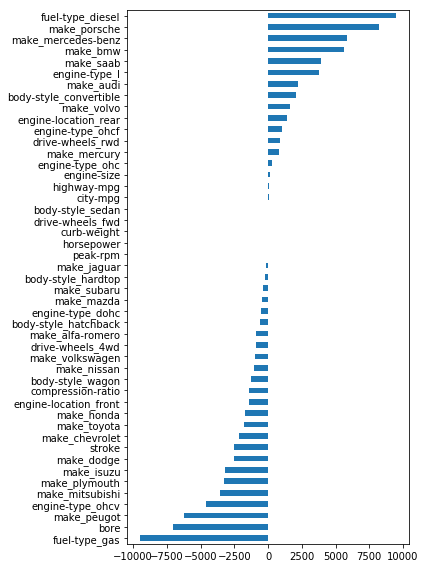

In [16]:
feature_importance = pd.Series(
    linreg.coef_, 
    index=columns).sort_values()
feature_importance.plot(kind='barh', figsize=(6, 8))
plt.tight_layout()
plt.show()

high price car mostly affected by automotive brand
gas and deiesel direct price on opposite price